# *Лабораторная работа №2*

## Построение регрессора для предсказания непрерывной величины (Теоретическая часть)

В данной лабораторной работе будет рассматриваться построение регрессионной модели для предсказания непрерывной величины.

In [ ]:
import pandas as pd
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense

import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Для примера построения регрессионной модели возьмем датасет, работу по очистке которого мы производили в рамках первой лекции (https://colab.research.google.com/drive/1fl7f7-8WA5GIjZ6qghfiD_2sEaCc1DQH?usp=sharing).

In [ ]:
%%capture
!wget https://www.dropbox.com/s/s1sqfsi6x7hbs28/autos_mod.csv

In [ ]:
df = pd.read_csv('autos_mod.csv', encoding='iso-8859-1')

In [ ]:
df.sample(10)

,Unnamed: 0,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage
165549,186572,1500,limousine,1996,manuell,150,5er,150000,benzin,bmw,ja
255247,287512,100,kleinwagen,1992,manuell,75,golf,150000,benzin,volkswagen,NaN
165568,186593,7299,limousine,2008,manuell,105,golf,150000,diesel,volkswagen,nein
33761,38250,3700,limousine,2001,automatik,125,astra,70000,benzin,opel,nein
239464,269811,1999,limousine,1996,manuell,116,golf,150000,benzin,volkswagen,nein
291375,328268,6900,suv,2006,manuell,177,rav,150000,diesel,toyota,nein
99916,112705,400,NaN,2000,manuell,75,polo,150000,NaN,volkswagen,nein
156583,176474,8799,kleinwagen,2013,manuell,86,ibiza,80000,benzin,seat,nein
93644,105619,8000,NaN,2018,manuell,125,a3,150000,benzin,audi,NaN
100290,113122,9200,kombi,2010,manuell,140,a3,150000,diesel,audi,NaN


Удалим лишний столбец, возникший в результате записи датасета в файл. Кроме того, очистим базу от пустых значений, так как не все регрессионные методы могут обрабатывать поврежденные данные.

In [ ]:
del df['Unnamed: 0']
df_wo_na = df.dropna()
df_wo_na.reset_index(inplace=True)
del df_wo_na['index']

Проверим, что остались только необходимые нам столбцы.

In [ ]:
df_wo_na.sample(10)

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage
74215,2599,limousine,2003,manuell,105,bora,150000,benzin,volkswagen,nein
159316,16950,coupe,2008,automatik,197,3er,150000,diesel,bmw,nein
167566,600,kleinwagen,1997,manuell,60,corsa,150000,benzin,opel,nein
212792,580,limousine,2014,automatik,258,5er,40000,diesel,bmw,nein
45256,950,kleinwagen,2001,manuell,82,micra,150000,benzin,nissan,nein
106797,29500,coupe,2011,automatik,514,andere,150000,benzin,mercedes_benz,nein
248905,1000,limousine,1994,manuell,90,80,150000,benzin,audi,ja
66456,3400,kombi,2001,automatik,193,5er,150000,diesel,bmw,nein
160827,12900,limousine,2004,automatik,194,5er,150000,benzin,bmw,nein
220047,3700,bus,1993,manuell,70,transporter,150000,diesel,volkswagen,nein


Проведем факторизацию в столбцах со строковыми значениями. Для этого выпишем имена всех объектных столбцов и в цикле будем вызывать factorize из библиотеки pandas. [0] в конце строки с командой необходим так как factorize возвращает два набора значений - преобразованный столбец значений и упорядоченный список меток. Так как проводить операцию обратную факторизации мы не собираемся, то и второй столбец для нас не представляет интереса.

In [ ]:
column_names = ['vehicleType', 'gearbox', 'model', 'fuelType', 'brand', 'notRepairedDamage']
for i in column_names:
  df_wo_na[i] = pd.factorize(df_wo_na[i])[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Разобьем выборку на тренировочный и тестовый наборы.

In [ ]:
Y = df_wo_na['price']
X = df_wo_na.drop(['price'], axis = 1)
train_points, test_points, train_values, test_values = train_test_split(X, Y, test_size = 0.2)

Обучим модель случайного леса из 100 решающих деревьев.

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(train_points, train_values)

RandomForestRegressor()

Оценку эффективности нашей модели проведем через расчет MAE. MAE (Mean Absolute Error) - средняя абсолютная ошибка, рассчитанная как сумма абсолютных ошибок в каждом предсказании, деленная на общий размер выборки.

In [ ]:
rf_predict = rf_model.predict(test_points)
print(mean_absolute_error(test_values, rf_predict))

3635.7588232677704


Разброс предсказнной цены в $5000+ не вызывает особого восторга. Попробуем произвести обучение других моделей и сравним результаты.

In [ ]:
nn_model = Sequential()
nn_model.add(Dense(9, activation='relu'))
nn_model.add(Dense(15, activation='relu'))
nn_model.add(Dense(15, activation='relu'))
nn_model.add(Dense(1, activation='linear'))

nn_model.compile(loss='mean_absolute_error', optimizer='adam')

results = nn_model.fit(
 train_points, train_values,
 epochs= 10,
 batch_size = 1000,
 validation_data = (test_points, test_values)
)

Epoch 1/10
201/201 [==============================] - 1s 3ms/step - loss: 12278.5439 - val_loss: 6314.9092
Epoch 2/10
201/201 [==============================] - 1s 2ms/step - loss: 7224.2466 - val_loss: 6296.7817
Epoch 3/10
201/201 [==============================] - 0s 2ms/step - loss: 7208.7354 - val_loss: 6279.5938
Epoch 4/10
201/201 [==============================] - 0s 2ms/step - loss: 7185.4399 - val_loss: 6251.1128
Epoch 5/10
201/201 [==============================] - 0s 2ms/step - loss: 7153.9487 - val_loss: 6211.6318
Epoch 6/10
201/201 [==============================] - 0s 2ms/step - loss: 7105.3135 - val_loss: 6146.1411
Epoch 7/10
201/201 [==============================] - 0s 2ms/step - loss: 7021.8955 - val_loss: 6041.4160
Epoch 8/10
201/201 [==============================] - 0s 2ms/step - loss: 6880.5552 - val_loss: 5849.9780
Epoch 9/10
201/201 [==============================] - 0s 2ms/step - loss: 6638.3892 - val_loss: 5548.7085
Epoch 10/10
201/201 [========================

Значение функции потерь при обучении нейронной сети является MAE оценкой. Получили сопоставимый со случайным лесом результат. 

Напоследок, построим регрессор через градиентный бустинг.

In [ ]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective = 'reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

In [ ]:
xg_reg.fit(train_points, train_values)

XGBRegressor(alpha=10, colsample_bytree=0.3, max_depth=5,
             objective='reg:squarederror')

In [ ]:
xgb_predict = xg_reg.predict(test_points)

Оценим качество получившейся модели.

In [ ]:
print(mean_absolute_error(test_values, xgb_predict))

6807.539584463642


Градиентный бустинг показал результаты еще хуже, чем были до этого... Попробуем проанализировать причины такого поведения.

Выведем график соответствия предсказанной и фактической цены.

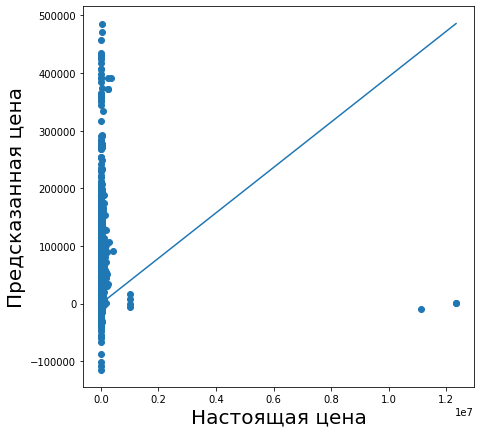

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(test_values, xgb_predict) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, max(test_values)], [0, max(xgb_predict)]) # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20);

Благодаря графическому представлению мы обнаружили сильнейшие вылеты максимальной цены автомобилей. Произведем анализ данного столбца.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb5bbbf8490>]],
      dtype=object)

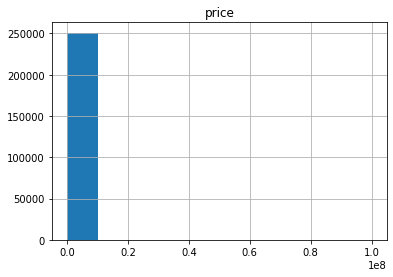

In [ ]:
df_wo_na.hist(["price"])

На гистограмме видно, что у нас есть экземпляры, цена на которые доходит до 100 миллиардов. Произведем отбор записей по цене, исключив также записи со слишком низкой ценой.

In [ ]:
df_wo_na = df_wo_na[(df_wo_na['price'] < 20000) & (df_wo_na['price'] > 50)]
df_wo_na.reset_index(inplace=True)
del df_wo_na['index']

Выведем гисторгамму для распределения цен на автомобили после внесенных нами изменений.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb5bbb13210>]],
      dtype=object)

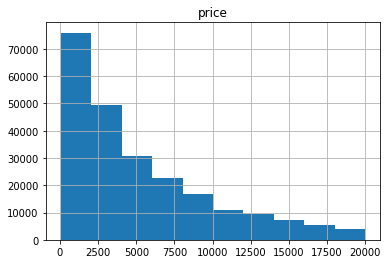

In [ ]:
df_wo_na.hist(["price"])

Вновь проведем разделение на тренировочную и тестовую выборки.

In [ ]:
Y = df_wo_na['price']
X = df_wo_na.drop(['price'], axis = 1)
train_points, test_points, train_values, test_values = train_test_split(X, Y, test_size = 0.2)

Создадим модель градиентного бустинга на основе обновленных данных.

In [ ]:
xg_reg.fit(train_points, train_values)

XGBRegressor(alpha=10, colsample_bytree=0.3, max_depth=5,
             objective='reg:squarederror')

In [ ]:
xgb_predict = xg_reg.predict(test_points)

In [ ]:
print(mean_absolute_error(test_values, xgb_predict))

1259.8023573321168


Получившийся результат гораздо лучше с точки зрения отклонения абсолютной ошибки. Выведем график, чтобы оценить произошедшие изменения.

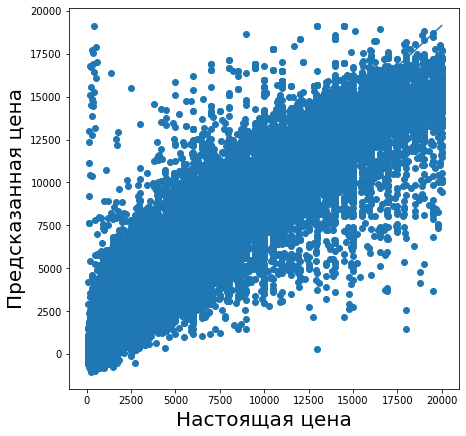

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(test_values, xgb_predict) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, max(test_values)], [0, max(xgb_predict)]) # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20);

На графике явно видно, что наша модель показывает гораздо худшие резуьтаты для автомобилей с низкой стоимостью. Запомним этот факт и попробуем собрать модель на основе случайного леса, так как до проведения фильтрации по цене градиентный бустинг показывал худшие результаты.

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(train_points, train_values)
rf_predict = rf_model.predict(test_points)

In [ ]:
print(mean_absolute_error(test_values, rf_predict))

974.8985945419688


Средняя абсолютная ошибка меньше для модели случайного леса почти на $300, что является серьезным аргументом в ее пользу. Выведем график с отклонениями.

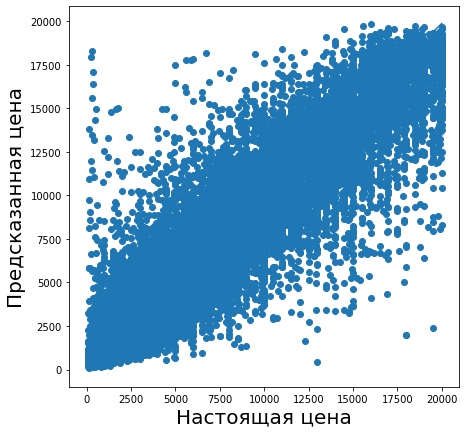

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(test_values, rf_predict) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, max(test_values)], [0, max(rf_predict)]) # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20);

Теперь давайте разберемся в причинах того, что градиентный бустинг показывает результаты гораздо хуже случайного леса. Разгадка кроется в типах ансамблевых методов, которые лежат в основе данных моделей.

Случайный лес работает на основе бэггинга, то есть собирает ансамбль из слабых учеников, каждый из которых имеет собственный независимый набор данных и, как следствие, свой набор правил разделения записей. После получения решения от всех учеников принимается некое усредненное значение.

Градиентный бустинг же направлен на исправление результата самого слабого ученика. Это приводит к тому, что итоговая модель будет смещаться в направлении самых больших вылетов, что мы и видели на графиках выше.

Можно сделать вывод, что механизм градиентного бустинга наилучшим образом подходит для решения задач со взвешенным набором данных, т.е. с (примерно) равным количеством записей, относящихся к каждому классу, либо диапазону значений.

Проведем исследование также для нейросетевой модели.

In [ ]:
nn_model = Sequential()
nn_model.add(Dense(9, activation='relu'))
nn_model.add(Dense(15, activation='relu'))
nn_model.add(Dense(15, activation='relu'))
nn_model.add(Dense(1))

nn_model.compile(loss='mean_absolute_error', optimizer='adam')

results = nn_model.fit(
 train_points, train_values,
 epochs= 10,
 batch_size = 100,
 validation_data = (test_points, test_values)
)

nn_predict = nn_model.predict(test_points)
print(mean_absolute_error(test_values, nn_predict))

Epoch 1/10
1860/1860 [==============================] - 4s 2ms/step - loss: 3251.7095 - val_loss: 2804.2341
Epoch 2/10
1860/1860 [==============================] - 4s 2ms/step - loss: 2655.9651 - val_loss: 2474.7788
Epoch 3/10
1860/1860 [==============================] - 4s 2ms/step - loss: 2462.0667 - val_loss: 2382.9041
Epoch 4/10
1860/1860 [==============================] - 4s 2ms/step - loss: 2403.8022 - val_loss: 2378.3169
Epoch 5/10
1860/1860 [==============================] - 4s 2ms/step - loss: 2386.6206 - val_loss: 2345.5977
Epoch 6/10
1860/1860 [==============================] - 4s 2ms/step - loss: 2386.3994 - val_loss: 2345.7913
Epoch 7/10
1860/1860 [==============================] - 4s 2ms/step - loss: 2366.6741 - val_loss: 2326.2334
Epoch 8/10
1860/1860 [==============================] - 4s 2ms/step - loss: 2369.4622 - val_loss: 2357.1716
Epoch 9/10
1860/1860 [==============================] - 4s 2ms/step - loss: 2354.4426 - val_loss: 2331.9324
Epoch 10/10
1860/1860 [=====

Теперь лидером нашего антирейтинга результатов стала модель, основанная на нейронных сетях.

Попробуем провести нормализацию данных и сранить результаты.

In [ ]:
df_norm = df_wo_na
Y = df_norm['price']
X = df_norm.drop(['price'], axis = 1)
for i in X.columns:
  X[i]=(X[i]-X[i].min())/(X[i].max()-X[i].min())

In [ ]:
X

,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage
0,0.000000,0.746269,0.0,0.126712,0.000000,1.000000,0.000000,0.000000,0.0
1,0.000000,0.850746,0.0,0.116438,0.004032,0.586207,0.166667,0.026316,0.0
2,0.142857,0.656716,0.0,0.172945,0.008065,1.000000,0.000000,0.052632,1.0
3,0.285714,0.791045,0.0,0.184932,0.012097,1.000000,0.000000,0.078947,0.0
4,0.142857,0.791045,0.0,0.178082,0.020161,1.000000,0.000000,0.105263,0.0
...,...,...,...,...,...,...,...,...,...
232494,0.142857,0.880597,0.0,0.238014,0.000000,1.000000,0.166667,0.000000,0.0
232495,0.428571,0.805970,0.0,0.003425,0.008065,1.000000,0.166667,0.052632,0.0
232496,0.142857,0.791045,0.0,0.383562,0.423387,1.000000,0.000000,0.236842,1.0
232497,0.285714,0.731343,1.0,0.171233,0.088710,0.827586,0.000000,0.342105,0.0


In [ ]:
Y

0         1500
1         3600
2          650
3         2200
4         2000
          ... 
232494    7900
232495    3999
232496    3200
232497    1199
232498    9200
Name: price, Length: 232499, dtype: int64

In [ ]:
train_points, test_points, train_values, test_values = train_test_split(X, Y, test_size = 0.2)

In [ ]:
xg_reg.fit(train_points, train_values)

XGBRegressor(alpha=10, colsample_bytree=0.3, max_depth=5,
             objective='reg:squarederror')

In [ ]:
xgb_predict = xg_reg.predict(test_points)

In [ ]:
print(mean_absolute_error(test_values, xgb_predict))

1263.6987663547352


Положительная динамика в модели градиентного бустинга прослеживается, но она явно не претендует на роль ключевого фактора.

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(train_points, train_values)
rf_predict = rf_model.predict(test_points)

In [ ]:
print(mean_absolute_error(test_values, rf_predict))

974.7274570763815


А вот для случайного леса нормализация сыграла даже немного отрицательную роль. Связано это с тем, что при построении правил решающему дереву гораздо проще ориентироваться на натуральные числа, нежели на диапазон [0, 1].

In [ ]:
nn_model = Sequential()
nn_model.add(Dense(9, activation='relu'))
nn_model.add(Dense(15, activation='relu'))
nn_model.add(Dense(15, activation='relu'))
nn_model.add(Dense(1))

nn_model.compile(loss='mean_absolute_error', optimizer='adam')

results = nn_model.fit(
 train_points, train_values,
 epochs= 10,
 batch_size = 100,
 validation_data = (test_points, test_values)
)

nn_predict = nn_model.predict(test_points)
print(mean_absolute_error(test_values, nn_predict))

Epoch 1/10
1860/1860 [==============================] - 4s 2ms/step - loss: 3728.5068 - val_loss: 2994.7524
Epoch 2/10
1860/1860 [==============================] - 4s 2ms/step - loss: 2470.2717 - val_loss: 2084.2078
Epoch 3/10
1860/1860 [==============================] - 4s 2ms/step - loss: 1996.8756 - val_loss: 1942.6102
Epoch 4/10
1860/1860 [==============================] - 4s 2ms/step - loss: 1906.2253 - val_loss: 1878.4269
Epoch 5/10
1860/1860 [==============================] - 4s 2ms/step - loss: 1849.8571 - val_loss: 1825.7202
Epoch 6/10
1860/1860 [==============================] - 4s 2ms/step - loss: 1795.4567 - val_loss: 1770.6097
Epoch 7/10
1860/1860 [==============================] - 4s 2ms/step - loss: 1735.1031 - val_loss: 1708.7047
Epoch 8/10
1860/1860 [==============================] - 4s 2ms/step - loss: 1669.7462 - val_loss: 1643.5508
Epoch 9/10
1860/1860 [==============================] - 4s 2ms/step - loss: 1602.7610 - val_loss: 1583.8517
Epoch 10/10
1860/1860 [=====

Для нейросетевой модели нормализация значительно облегчила задачу, но приблизиться к точности ансамблевых методов мы так и не смогли.

Рассмотрим популярность различных признаков при принятии решения в модели градиентного бустинга и попробуем удалить наиболее непопулярные.

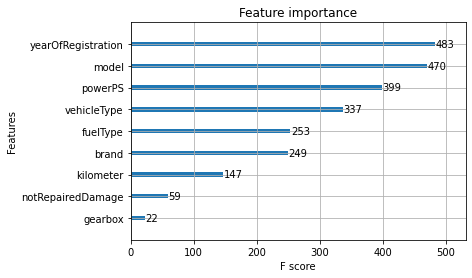

In [ ]:
xgb.plot_importance(xg_reg)
plt.show()

In [ ]:
del df_wo_na['notRepairedDamage']
del df_wo_na['gearbox']
train_points, test_points, train_values, test_values = train_test_split(X, Y, test_size = 0.2)

Проверим влияние внесенных изменений на качество наших моделей.

In [ ]:
nn_model = Sequential()
nn_model.add(Dense(7, activation='relu'))
nn_model.add(Dense(15, activation='relu'))
nn_model.add(Dense(15, activation='relu'))
nn_model.add(Dense(1))

nn_model.compile(loss='mean_absolute_error', optimizer='adam')

results = nn_model.fit(
 train_points, train_values,
 epochs= 10,
 batch_size = 100,
 validation_data = (test_points, test_values)
)

nn_predict = nn_model.predict(test_points)
print(mean_absolute_error(test_values, nn_predict))

Epoch 1/10
1860/1860 [==============================] - 4s 2ms/step - loss: 3779.1697 - val_loss: 3155.6938
Epoch 2/10
1860/1860 [==============================] - 4s 2ms/step - loss: 2746.5845 - val_loss: 2285.4272
Epoch 3/10
1860/1860 [==============================] - 4s 2ms/step - loss: 2032.7822 - val_loss: 1951.3147
Epoch 4/10
1860/1860 [==============================] - 4s 2ms/step - loss: 1906.7482 - val_loss: 1888.9276
Epoch 5/10
1860/1860 [==============================] - 4s 2ms/step - loss: 1858.7948 - val_loss: 1844.8885
Epoch 6/10
1860/1860 [==============================] - 4s 2ms/step - loss: 1820.9855 - val_loss: 1812.6378
Epoch 7/10
1860/1860 [==============================] - 4s 2ms/step - loss: 1783.1458 - val_loss: 1769.7551
Epoch 8/10
1860/1860 [==============================] - 4s 2ms/step - loss: 1743.0916 - val_loss: 1725.0785
Epoch 9/10
1860/1860 [==============================] - 3s 2ms/step - loss: 1700.7660 - val_loss: 1681.0359
Epoch 10/10
1860/1860 [=====

Точность нейросетевой модели, хоть и незначительно, но упала.

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(train_points, train_values)
rf_predict = rf_model.predict(test_points)

In [ ]:
print(mean_absolute_error(test_values, rf_predict))

977.8051286320285


In [ ]:
xg_reg.fit(train_points, train_values)
xgb_predict = xg_reg.predict(test_points)
print(mean_absolute_error(test_values, xgb_predict))

1260.5457254826144


А вот ансамблевые методы показали небольшой рост точности.

Ну и напоследок проверим, каким образом скажется на качестве моделей разделение столбцов по способу факторизации.

In [ ]:
df_wo_na = df.dropna()
df_wo_na.reset_index(inplace=True)
del df_wo_na['index']

Для столбцов с высокой кардинальностью оставим стандартный алгоритм, а для столбцов с низкой применим OneHotEncoding.

In [ ]:
column_names_fact = ['vehicleType', 'model','brand']
column_names_dummies = ['gearbox', 'fuelType', 'notRepairedDamage']
for i in column_names_fact:
  df_wo_na[i] = pd.factorize(df_wo_na[i])[0]
df_wo_na = pd.get_dummies(df_wo_na, prefix=column_names_dummies)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df_wo_na = df_wo_na[(df_wo_na['price'] < 20000) & (df_wo_na['price'] > 50)]
df_wo_na.reset_index(inplace=True)
del df_wo_na['index']

In [ ]:
Y = df_wo_na['price']
X = df_wo_na.drop(['price'], axis = 1)

In [ ]:
train_points, test_points, train_values, test_values = train_test_split(X, Y, test_size = 0.2)

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(train_points, train_values)
rf_predict = rf_model.predict(test_points)

In [ ]:
print(mean_absolute_error(test_values, rf_predict))

971.7590725478934


Модель случайного леса осталась равнодушна к увеличению количества столбцов.

In [ ]:
xg_reg.fit(train_points, train_values)
xgb_predict = xg_reg.predict(test_points)
print(mean_absolute_error(test_values, xgb_predict))

1169.2308541268892


А вот градиентный бустинг значительно улучшил точность предсказываемой цены.

In [ ]:
nn_model = Sequential()
nn_model.add(Dense(17, activation='relu'))
nn_model.add(Dense(15, activation='relu'))
nn_model.add(Dense(15, activation='relu'))
nn_model.add(Dense(1))

nn_model.compile(loss='mean_absolute_error', optimizer='adam')

results = nn_model.fit(
 train_points, train_values,
 epochs= 10,
 batch_size = 100,
 validation_data = (test_points, test_values)
)

nn_predict = nn_model.predict(test_points)
print(mean_absolute_error(test_values, nn_predict))

Epoch 1/10
1860/1860 [==============================] - 4s 2ms/step - loss: 3072.5933 - val_loss: 2802.3242
Epoch 2/10
1860/1860 [==============================] - 4s 2ms/step - loss: 2585.0920 - val_loss: 2455.4033
Epoch 3/10
1860/1860 [==============================] - 4s 2ms/step - loss: 2438.9395 - val_loss: 2413.8308
Epoch 4/10
1860/1860 [==============================] - 4s 2ms/step - loss: 2404.0010 - val_loss: 2366.2571
Epoch 5/10
1860/1860 [==============================] - 4s 2ms/step - loss: 2382.0056 - val_loss: 2351.4871
Epoch 6/10
1860/1860 [==============================] - 4s 2ms/step - loss: 2371.4365 - val_loss: 2314.9187
Epoch 7/10
1860/1860 [==============================] - 4s 2ms/step - loss: 2359.6353 - val_loss: 2351.5256
Epoch 8/10
1860/1860 [==============================] - 4s 2ms/step - loss: 2348.1101 - val_loss: 2286.4573
Epoch 9/10
1860/1860 [==============================] - 4s 2ms/step - loss: 2330.0085 - val_loss: 2273.3806
Epoch 10/10
1860/1860 [=====

Нейронные сети продемонcтрировали ухудшение качества модели при увеличении объема входных данных.

Попробуем собрать еще модель линейной регрессии.

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_points, train_values)
lr_predict = model.predict(test_points)
print(mean_absolute_error(test_values, lr_predict))

2048.519384143262


Метрика MAE говорит, что модель линейной регрессии справляется с задачей лучше, чем нейронные сети. Проверим этот результат графически.

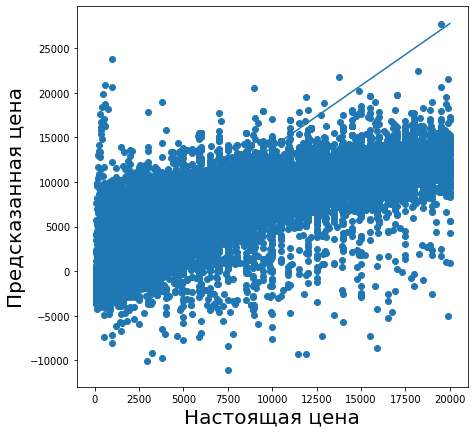

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(test_values, lr_predict) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, max(test_values)], [0, max(lr_predict)]) # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20);

Из-за излишней концентрации на вылетах модель линейной регрессии имеет тенденцию занижать цену для дорогих автомобилей. Связано это с тем, что наша выборка не является взвешенной, то есть имеет гораздо меньший объем записей об автомобилях с высокой ценой, чем с низкой.

## Построение регрессора для предсказания непрерывной величины (*Практическая* часть)

###Задание базового уровня

Вашим заданием в данной лабораторной будет построение регрессионной модели для предсказания цены квартиры для датасета, содержащего информацию о продаже недвижимости в Нью-Йорке.

https://www.kaggle.com/new-york-city/nyc-property-sales

###Задание повышенного уровня

Выполнить задание базового уровня. Методика оценки - **mean_absolute_error**. Ошибка для полученного решения должна быть ниже отметки **125000**.

Размер датасета после всех производимых манипуляций должен быть больше **50000** записей.


In [ ]:
%%capture
!wget https://www.dropbox.com/s/0un1sdvifenp2ir/nyc-rolling-sales.csv